In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
data_dictionary = pd.read_csv('.\..\data\diccionario_de_datos\denue_diccionario_de_datos.csv', encoding='latin1', header=1)
raw_data = pd.read_csv('.\..\data\conjunto_de_datos\denue_inegi_62_.csv', encoding='latin1')

C:\Users\ruben\AppData\Local\Temp\ipykernel_9956\1653580122.py:2: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_data = pd.read_csv('.\..\data\conjunto_de_datos\denue_inegi_62_.csv', encoding='latin1')


In [3]:
interest_columns = ['per_ocu','latitud', 'longitud']
interest_df = raw_data[interest_columns]

In [4]:
label_dict = {
    '0 a 5 personas': 0,
    '31 a 50 personas': 3,
    '11 a 30 personas': 2,
    '6 a 10 personas': 1,
    '101 a 250 personas': 5,
    '51 a 100 personas': 4,
    '251 y más personas': 6
}

interest_df['tag'] = interest_df['per_ocu'].replace(label_dict)

C:\Users\ruben\AppData\Local\Temp\ipykernel_9956\3679066776.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interest_df['tag'] = interest_df['per_ocu'].replace(label_dict)


In [5]:
sorted_labels = sorted(label_dict.items(), key=lambda x:x[1])

In [6]:
N = len(interest_df['per_ocu'].unique())

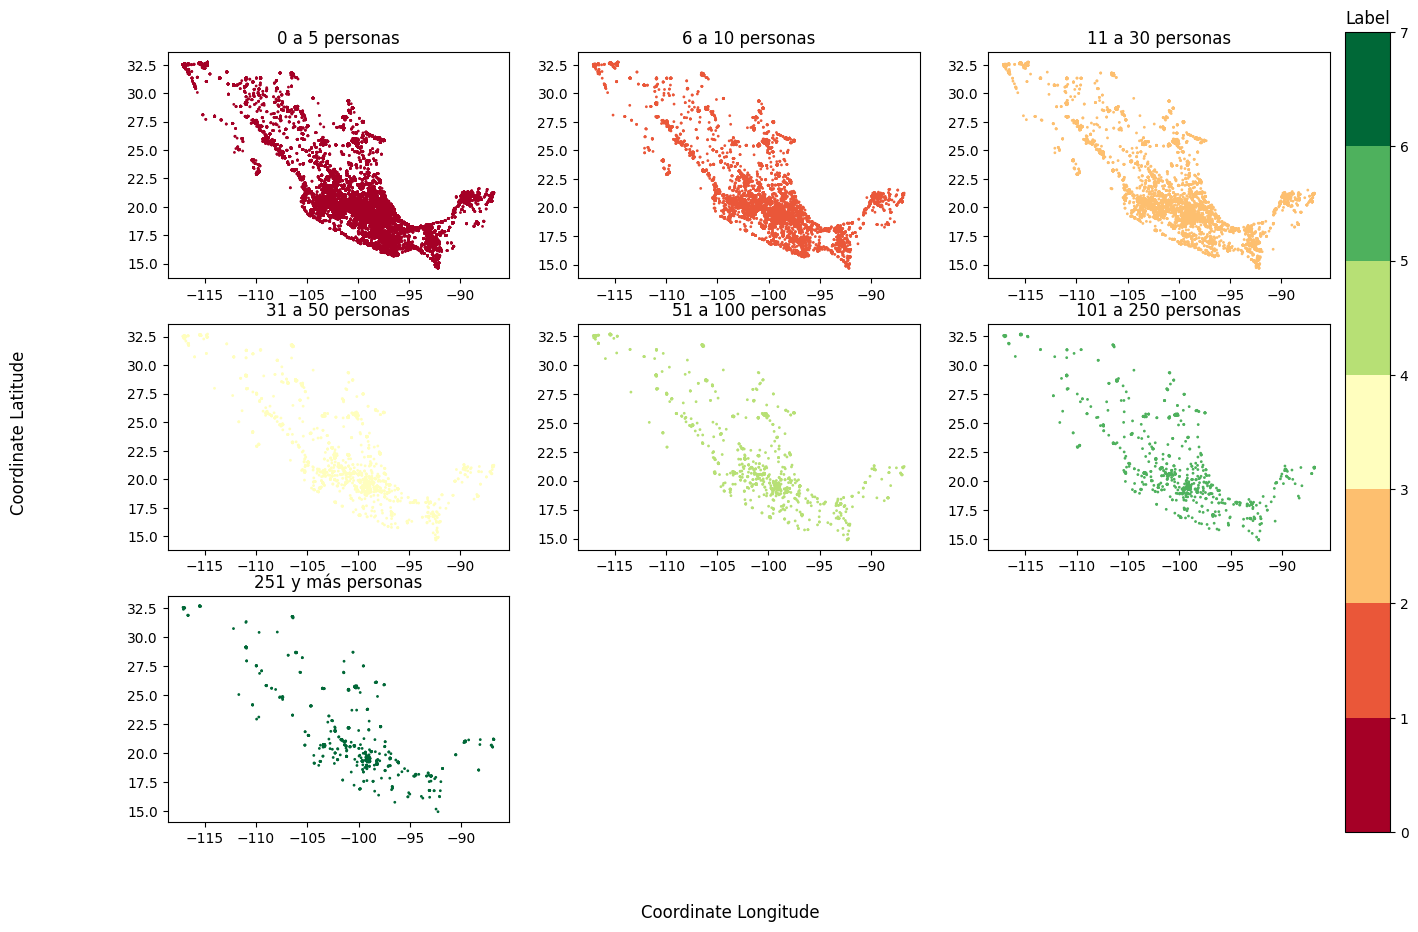

In [7]:
fig, axes = plt.subplots(3,3, figsize=(15,10))

cmap = plt.cm.RdYlGn
cmaplist = [cmap(i) for i in range(cmap.N)]
cmap = cmap.from_list('Custom map', cmaplist, cmap.N)

bounds = np.linspace(0,N,N+1)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

for i in range(7):
    x = interest_df.loc[interest_df['tag'] == i]['longitud']
    y = interest_df.loc[interest_df['tag'] == i]['latitud']
    tag = interest_df.loc[interest_df['tag'] == i]['tag']
    scat_plt = axes.flat[i].scatter(x,y, c=tag, s=1, cmap=cmap, norm=norm)
    axes.flat[i].set_title(sorted_labels[i][0])

fig.delaxes(axes[2][2])
fig.delaxes(axes[2][1])

fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes((0.91, 0.1, 0.03, 0.8))
cbar_ax.set_title('Label')
fig.colorbar(scat_plt, spacing='proportional',ticks=bounds,cax=cbar_ax)
fig.supxlabel('Coordinate Longitude')
fig.supylabel('Coordinate Latitude')
plt.show()

In [8]:
from sklearn.cluster import DBSCAN
from sklearn.cluster import OPTICS

In [9]:
# kmeans = KMeans()
# params = {
#     'n_clusters': [4, 8, 12, 16],
#     'n_init': [5, 10, 15, 20],
#     'algorithm': ['lloyd', 'elkan']
# }
# clf = GridSearchCV(kmeans, param_grid=params, cv=4)
# clf.fit(interest_df[['latitud','longitud']])
# 
# kmeans.fit(interest_df[['latitud','longitud']])

In [10]:
optics = OPTICS()
optics.fit(interest_df[['latitud','longitud']])

c:\Users\ruben\Documents\GitHub\health-services\env\lib\site-packages\sklearn\cluster\_optics.py:932: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


OPTICS()

Text(0, 0.5, 'Latitude')

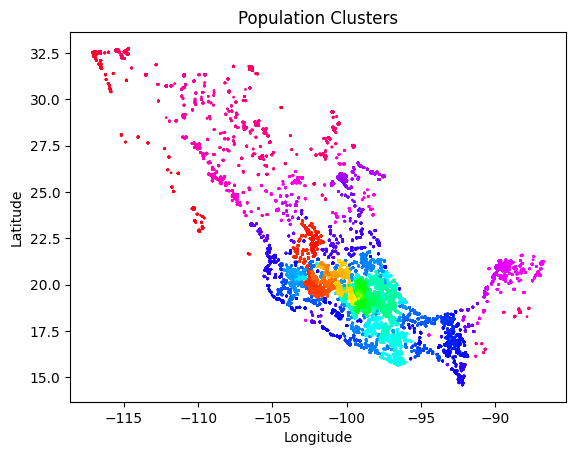

In [18]:

optics_df = interest_df.copy()
optics_df['labels'] = optics.labels_

no_outliers_df = optics_df.loc[optics_df['labels'] != -1]
plt.scatter(no_outliers_df['longitud'], no_outliers_df['latitud'], c=no_outliers_df['labels'],cmap='hsv', s=1)
plt.title('Population Clusters')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

Text(0, 0.5, 'Latitude')

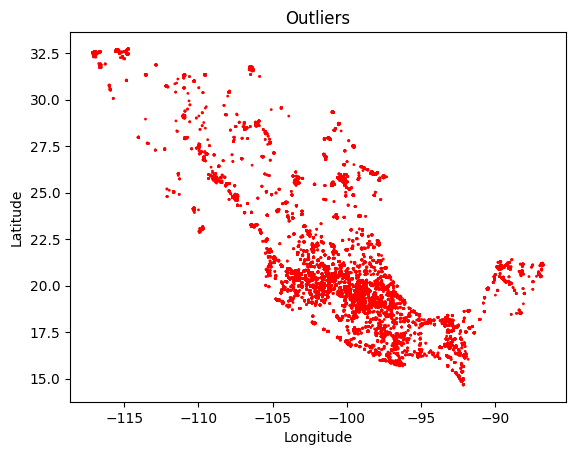

In [13]:
optics_df = interest_df.copy()
optics_df['labels'] = optics.labels_

outliers_df = optics_df.loc[optics_df['labels'] == -1]
plt.scatter(outliers_df['longitud'], outliers_df['latitud'], c=outliers_df['labels'],cmap='hsv', s=1)
plt.title('Outliers')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

In [14]:
len(outliers_df)

82333

In [16]:
len(raw_data)

234303

In [9]:
# Creating datsets per occupancy tag
data_sets = []
for i in range(7):
    interest_data = interest_df.loc[interest_df['tag'] == i][['longitud', 'latitud']]
    data_sets.append(interest_data)

In [10]:
# Model Labels
model_labels = []
for i in range(7):
    optics3 = OPTICS()
    optics3.fit(data_sets[i])
    data_sets[i]['label'] = optics3.labels_
    model_labels.append(optics3.labels_)

c:\Users\ruben\Documents\GitHub\health-services\env\lib\site-packages\sklearn\cluster\_optics.py:932: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]
c:\Users\ruben\Documents\GitHub\health-services\env\lib\site-packages\sklearn\cluster\_optics.py:932: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]
c:\Users\ruben\Documents\GitHub\health-services\env\lib\site-packages\sklearn\cluster\_optics.py:932: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


In [11]:
[len(np.unique(i)) for i in model_labels]

[13322, 1414, 905, 180, 106, 68, 67]

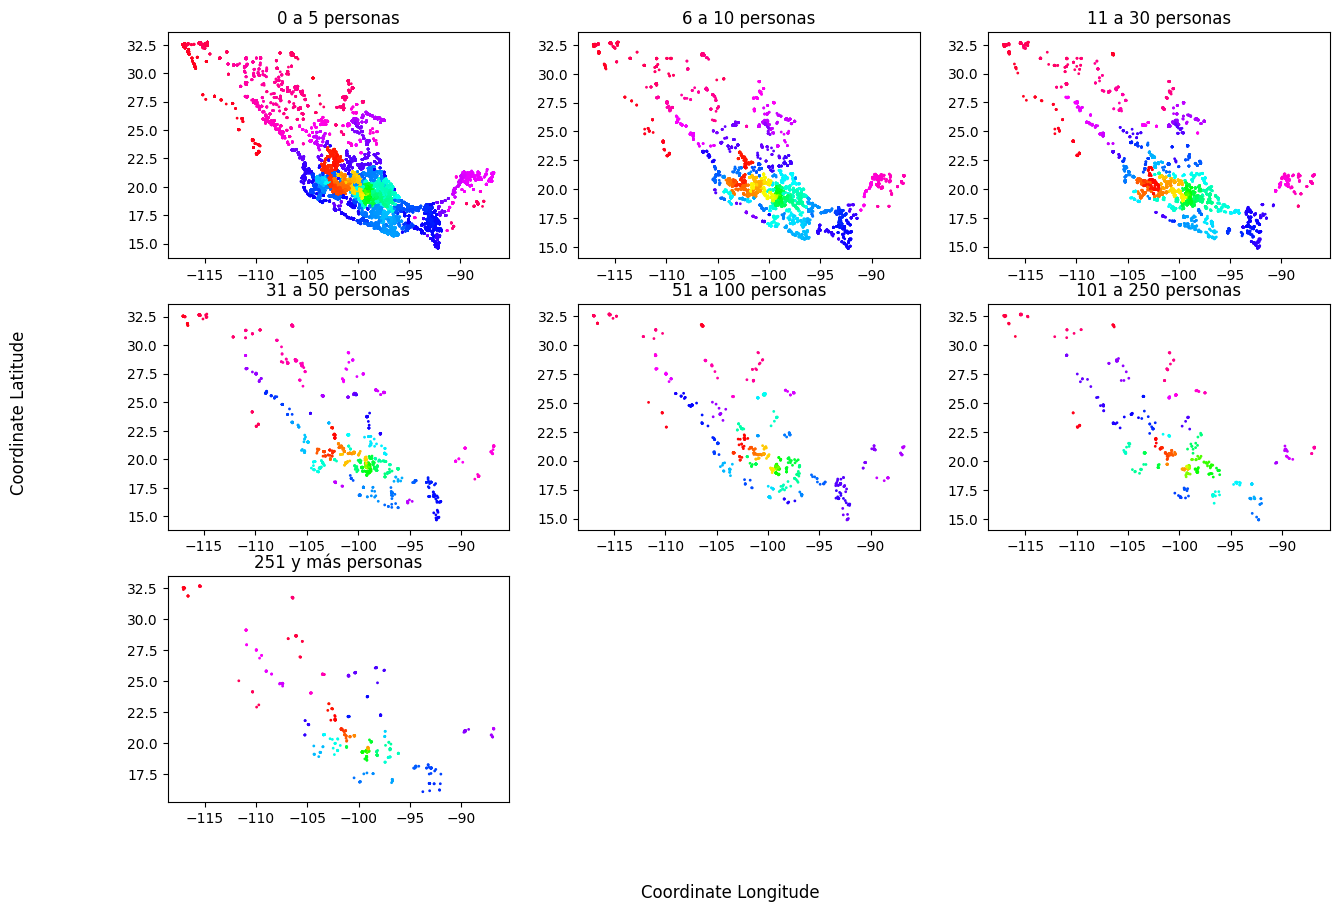

In [16]:
N = max([len(np.unique(i)) for i in model_labels])

fig, axes = plt.subplots(3,3, figsize=(15,10))

for i in range(7):
    interest_dataset = data_sets[i]
    interest_dataset['tag']= model_labels[i]

    plot_dataset = interest_dataset.loc[interest_dataset['tag'] != -1]
    x = plot_dataset['longitud']
    y = plot_dataset['latitud']
    tag = plot_dataset['tag']
    
    scat_plt = axes.flat[i].scatter(x,y, c=tag, s=1, cmap='hsv')
    axes.flat[i].set_title(sorted_labels[i][0])

fig.delaxes(axes[2][2])
fig.delaxes(axes[2][1])

fig.supxlabel('Coordinate Longitude')
fig.supylabel('Coordinate Latitude')
plt.show()

Text(0, 0.5, 'Latitude')

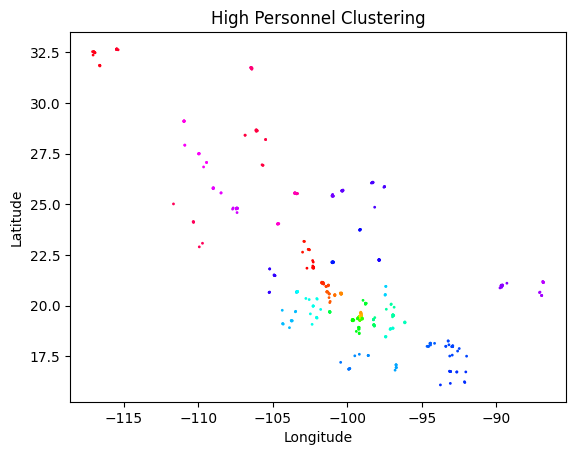

In [19]:
interest_dataset = data_sets[6]
interest_dataset['tag']= model_labels[6]

plot_dataset = interest_dataset.loc[interest_dataset['tag'] != -1]
x = plot_dataset['longitud']
y = plot_dataset['latitud']
tag = plot_dataset['tag']
    
plt.scatter(x,y, c=tag, s=1, cmap='hsv')
plt.title('High Personnel Clustering')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

In [15]:
optics2 = OPTICS()
optics2.fit(data_sets[0][['longitud','latitud']])
data_sets[0]['label'] = optics2.labels_

c:\Users\ruben\Documents\GitHub\health-services\env\lib\site-packages\sklearn\cluster\_optics.py:932: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


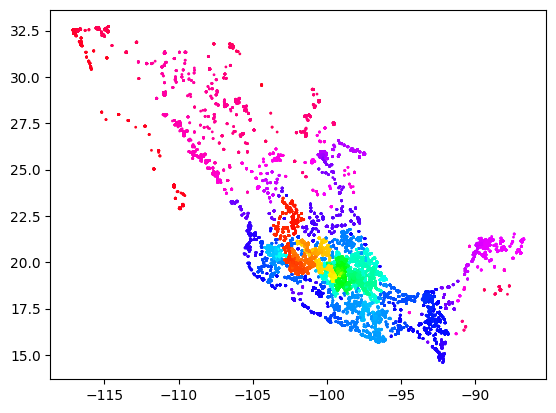

In [16]:
filtered_ds = data_sets[0].loc[data_sets[0]['label'] != -1]

x = filtered_ds['longitud']
y = filtered_ds['latitud']
tag = filtered_ds['label']

plt.scatter(x, y, c=tag ,cmap='hsv', s=1)